# GebPy Tutorials
## Mineral Analysis

In [1]:
import os, sys
currentdir = os.path.dirname(os.path.realpath("Minerals.ipynb"))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

In [37]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from modules.minerals import feldspars
import ternary

### Introduction 

Hello, this Jupyter notebook wants to show you some possible features and possibilites concerning the simulation and data analysis of GebPy's mineralogy module called "minerals". For this purpose, the minerals of the feldspar group are simulated. 

In [134]:
n_samples = 100

data = feldspars()
data_kfs = []
data_pl = []
data_k = []
data_na = [[], []]
data_ca = []
for i in range(n_samples):
    data = feldspars()
    kfs_sim = data.alkalifeldspar(keyword="None")
    pl_sim = data.plagioclase(keyword="None")
    data_kfs.append([kfs_sim[0], kfs_sim[1][0], kfs_sim[2], kfs_sim[5][0], kfs_sim[5][2], kfs_sim[4][0], kfs_sim[4][1], kfs_sim[6][0], kfs_sim[6][1], kfs_sim[6][2], kfs_sim[6][3], kfs_sim[6][4]])
    data_pl.append([pl_sim[0], pl_sim[1][0], pl_sim[2], pl_sim[5][0], pl_sim[5][2], pl_sim[4][0], pl_sim[4][1], pl_sim[6][0], pl_sim[6][1], pl_sim[6][2], pl_sim[6][3], pl_sim[6][4]])
    data_k.append(kfs_sim[1][1])
    data_na[0].append(1-kfs_sim[1][1])
    data_na[1].append(1-pl_sim[1][1])
    data_ca.append(1-pl_sim[1][1])

df_kfs = pd.DataFrame(data_kfs, columns=["NAME", "M", "RHOB", "GR", "U", "VP", "VS", "O", "Na", "Al", "Si", "K"])
df_pl = pd.DataFrame(data_pl, columns=["NAME", "M", "RHOB", "GR", "U", "VP", "VS", "O", "Na", "Al", "Si", "Ca"])

In [135]:
df_kfs.round(decimals=4)

,NAME,M,RHOB,GR,U,VP,VS,O,Na,Al,Si,K
0,Sa,273.17,2586.9,155.72,6.51,8327.0,4970.6,0.4685,0.0269,0.0988,0.3084,0.0973
1,Sa,271.40,2591.4,131.38,6.19,8379.9,4998.1,0.4716,0.0364,0.0994,0.3104,0.0821
2,Ab,263.51,2611.5,18.99,4.67,8609.1,5117.8,0.4857,0.0803,0.1024,0.3197,0.0119
3,Sa,269.31,2596.7,102.21,5.80,8441.6,5030.3,0.4753,0.0478,0.1002,0.3129,0.0639
4,Or,277.68,2575.4,216.27,7.32,8190.2,4899.4,0.4609,0.0033,0.0972,0.3034,0.1352
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sa,268.82,2598.0,95.41,5.70,8455.8,5037.7,0.4761,0.0505,0.1004,0.3134,0.0596
96,Sa,269.14,2597.1,99.94,5.77,8446.4,5032.8,0.4756,0.0487,0.1003,0.3130,0.0625
97,Ano,264.47,2609.1,33.11,4.86,8581.6,5103.4,0.4839,0.0748,0.1020,0.3186,0.0207
98,Sa,273.17,2586.9,155.72,6.51,8327.0,4970.6,0.4685,0.0269,0.0988,0.3084,0.0973


In [136]:
df_kfs.describe().round(decimals=4)

,M,RHOB,GR,U,VP,VS,O,Na,Al,Si,K
count,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,100.0000,100.0000,100.0000,100.0000,100.0000
mean,270.5114,2593.6610,118.0849,6.0066,8404.6750,5011.124,0.4733,0.0416,0.0998,0.3115,0.0738
std,4.3491,11.1021,60.5370,0.8141,128.5001,66.998,0.0076,0.0236,0.0016,0.0050,0.0378
min,262.7000,2573.7000,7.1400,4.5100,8170.3000,4889.100,0.4599,0.0000,0.0969,0.3027,0.0045
25%,266.8500,2584.7000,67.3950,5.3225,8301.6750,4957.375,0.4671,0.0225,0.0985,0.3074,0.0421
50%,270.3500,2594.1000,116.8500,5.9950,8410.8500,5014.250,0.4734,0.0421,0.0998,0.3116,0.0730
75%,274.0200,2603.0000,167.2250,6.6675,8513.2500,5067.700,0.4797,0.0614,0.1011,0.3157,0.1045
max,278.3300,2613.6000,224.7600,7.4300,8632.0000,5129.800,0.4872,0.0849,0.1027,0.3207,0.1405


In [137]:
df_pl.round(decimals=4)

,NAME,M,RHOB,GR,U,VP,VS,O,Na,Al,Si,Ca
0,Byt,274.53,2721.9,0,7.65,8762.1,5165.8,0.4662,0.0193,0.1740,0.2281,0.1124
1,Lab,270.53,2687.1,0,6.60,8725.5,5156.7,0.4731,0.0408,0.1516,0.2575,0.0770
2,An,277.88,2751.1,0,8.53,8792.1,5173.2,0.4606,0.0017,0.1923,0.2042,0.1413
3,An,276.92,2742.8,0,8.28,8783.6,5171.1,0.4622,0.0066,0.1871,0.2109,0.1331
4,Andes,267.81,2663.5,0,5.89,8699.9,5150.3,0.4779,0.0558,0.1360,0.2779,0.0524
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Andes,268.29,2667.7,0,6.02,8704.5,5151.5,0.4771,0.0531,0.1388,0.2743,0.0568
96,Byt,275.33,2728.9,0,7.87,8769.3,5167.5,0.4649,0.0150,0.1784,0.2224,0.1194
97,Olg,264.14,2631.5,0,4.92,8664.5,5141.6,0.4846,0.0766,0.1144,0.3062,0.0182
98,An,277.56,2748.3,0,8.45,8789.2,5172.5,0.4611,0.0033,0.1905,0.2064,0.1386


In [138]:
df_pl.describe().round(decimals=4)

,M,RHOB,GR,U,VP,VS,O,Na,Al,Si,Ca
count,100.0000,100.0000,100.0,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
mean,270.8574,2689.9800,0.0,6.6873,8727.6840,5157.2340,0.4727,0.0395,0.1530,0.2557,0.0792
std,4.8760,42.4302,0.0,1.2837,45.4487,11.2713,0.0085,0.0267,0.0277,0.0364,0.0439
min,262.3800,2616.2000,0.0,4.4500,8647.2000,5137.3000,0.4601,0.0000,0.1039,0.2019,0.0015
25%,266.3800,2651.0000,0.0,5.5100,8686.2000,5146.9000,0.4656,0.0172,0.1276,0.2252,0.0391
50%,271.4100,2694.8000,0.0,6.8350,8733.6000,5158.7000,0.4716,0.0360,0.1566,0.2510,0.0849
75%,274.9300,2725.4000,0.0,7.7600,8765.7250,5166.6750,0.4805,0.0639,0.1762,0.2889,0.1159
max,278.2000,2753.9000,0.0,8.6200,8794.9000,5173.9000,0.4878,0.0867,0.1940,0.3200,0.1441


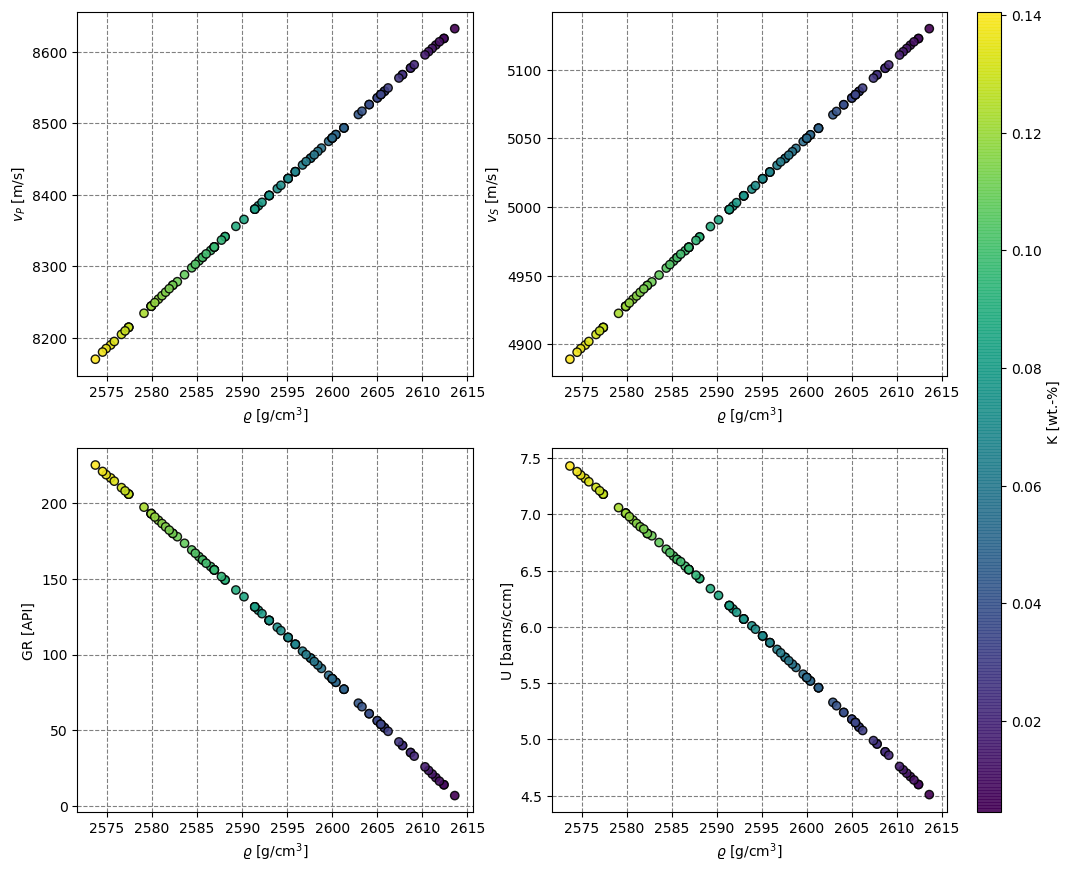

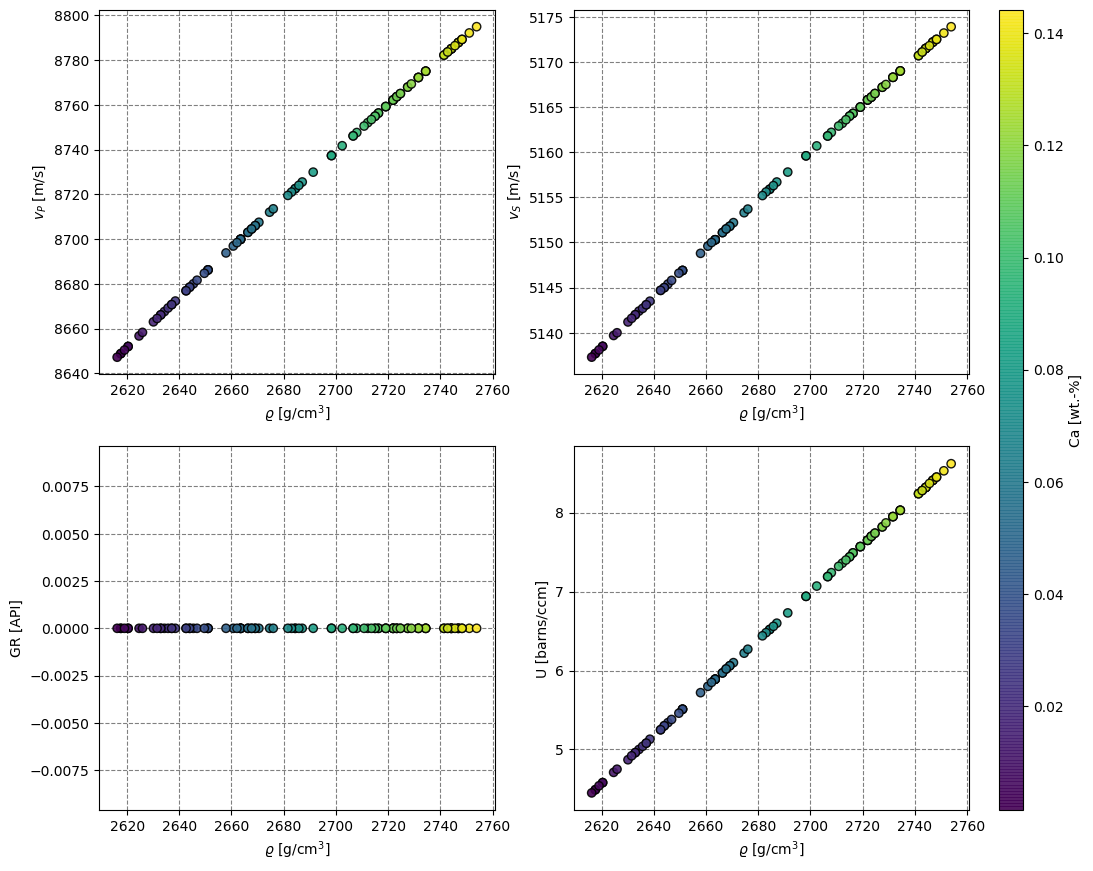

In [139]:
fig, axs = plt.subplots(2, 2, dpi=100, figsize=(12,10))

for i in range(2):
    for j in range(2):
        axs[i,j].set_xlabel("$\\varrho$ [g/cm$^3$]")
        axs[i,j].grid(color="grey", linestyle="dashed")
        axs[i,j].set_axisbelow(True)

im = axs[0,0].scatter(df_kfs["RHOB"], df_kfs["VP"], c=df_kfs["K"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[0,0].set_ylabel("$v_P$ [m/s]")
im = axs[0,1].scatter(df_kfs["RHOB"], df_kfs["VS"], c=df_kfs["K"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[0,1].set_ylabel("$v_S$ [m/s]")
im = axs[1,0].scatter(df_kfs["RHOB"], df_kfs["GR"], c=df_kfs["K"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[1,0].set_ylabel("GR [API]")
im = axs[1,1].scatter(df_kfs["RHOB"], df_kfs["U"], c=df_kfs["K"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[1,1].set_ylabel("U [barns/ccm]")

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.825, wspace=0.2, hspace=0.2)
cb_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label("K [wt.-%]")

#plt.savefig("Tutorial_Minerals-Feldspars_01.png", bbox_inches="tight")
plt.show()

fig, axs = plt.subplots(2, 2, dpi=100, figsize=(12,10))

for i in range(2):
    for j in range(2):
        axs[i,j].set_xlabel("$\\varrho$ [g/cm$^3$]")
        axs[i,j].grid(color="grey", linestyle="dashed")
        axs[i,j].set_axisbelow(True)

im = axs[0,0].scatter(df_pl["RHOB"], df_pl["VP"], c=df_pl["Ca"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[0,0].set_ylabel("$v_P$ [m/s]")
im = axs[0,1].scatter(df_pl["RHOB"], df_pl["VS"], c=df_pl["Ca"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[0,1].set_ylabel("$v_S$ [m/s]")
im = axs[1,0].scatter(df_pl["RHOB"], df_pl["GR"], c=df_pl["Ca"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[1,0].set_ylabel("GR [API]")
im = axs[1,1].scatter(df_pl["RHOB"], df_pl["U"], c=df_pl["Ca"], cmap="viridis", edgecolors="black", alpha=0.9)
axs[1,1].set_ylabel("U [barns/ccm]")

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.825, wspace=0.2, hspace=0.2)
cb_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label("Ca [wt.-%]")

#plt.savefig("Tutorial_Minerals-Feldspars_02.png", bbox_inches="tight")
plt.show()

In [140]:
d_kfs = {"K": data_k, "Na": data_na[0], "Ca": np.zeros(len(data_k))}
d_pl = {"K": np.zeros(len(data_k)), "Na": data_na[1], "Ca": data_ca}
df_kfs_ternary = pd.DataFrame(data=d_kfs)
df_pl_ternary = pd.DataFrame(data=d_pl)

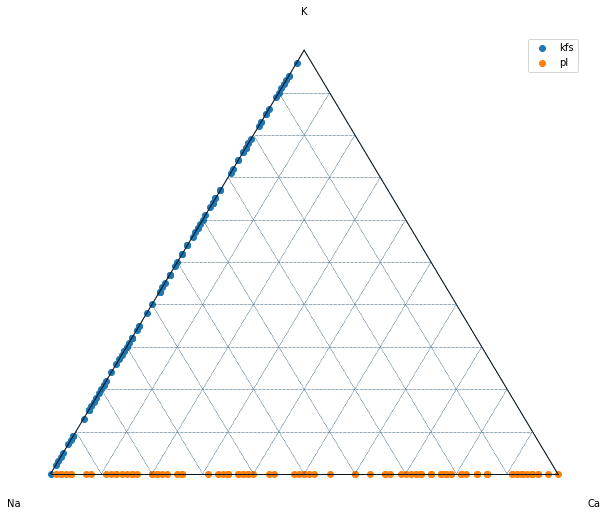

In [141]:
fig, tax = ternary.figure(scale=1)
fig.set_size_inches(10, 9)
tax.boundary(linewidth=1.0)
tax.gridlines(color="black", multiple=0.1)

tax.scatter(df_kfs_ternary[["Ca", "K", "Na"]].values, label="kfs")
tax.scatter(df_pl_ternary[["Ca", "K", "Na"]].values,  label="pl")
#tax.scatter([Q], label="Qz")
#tax.scatter([F], label="F")
#tax.scatter([L], label="L")
tax.gridlines(multiple=0.1)
tax.get_axes().axis('off')
tax.top_corner_label("K")
tax.left_corner_label("Na")
tax.right_corner_label("Ca")
tax.legend()

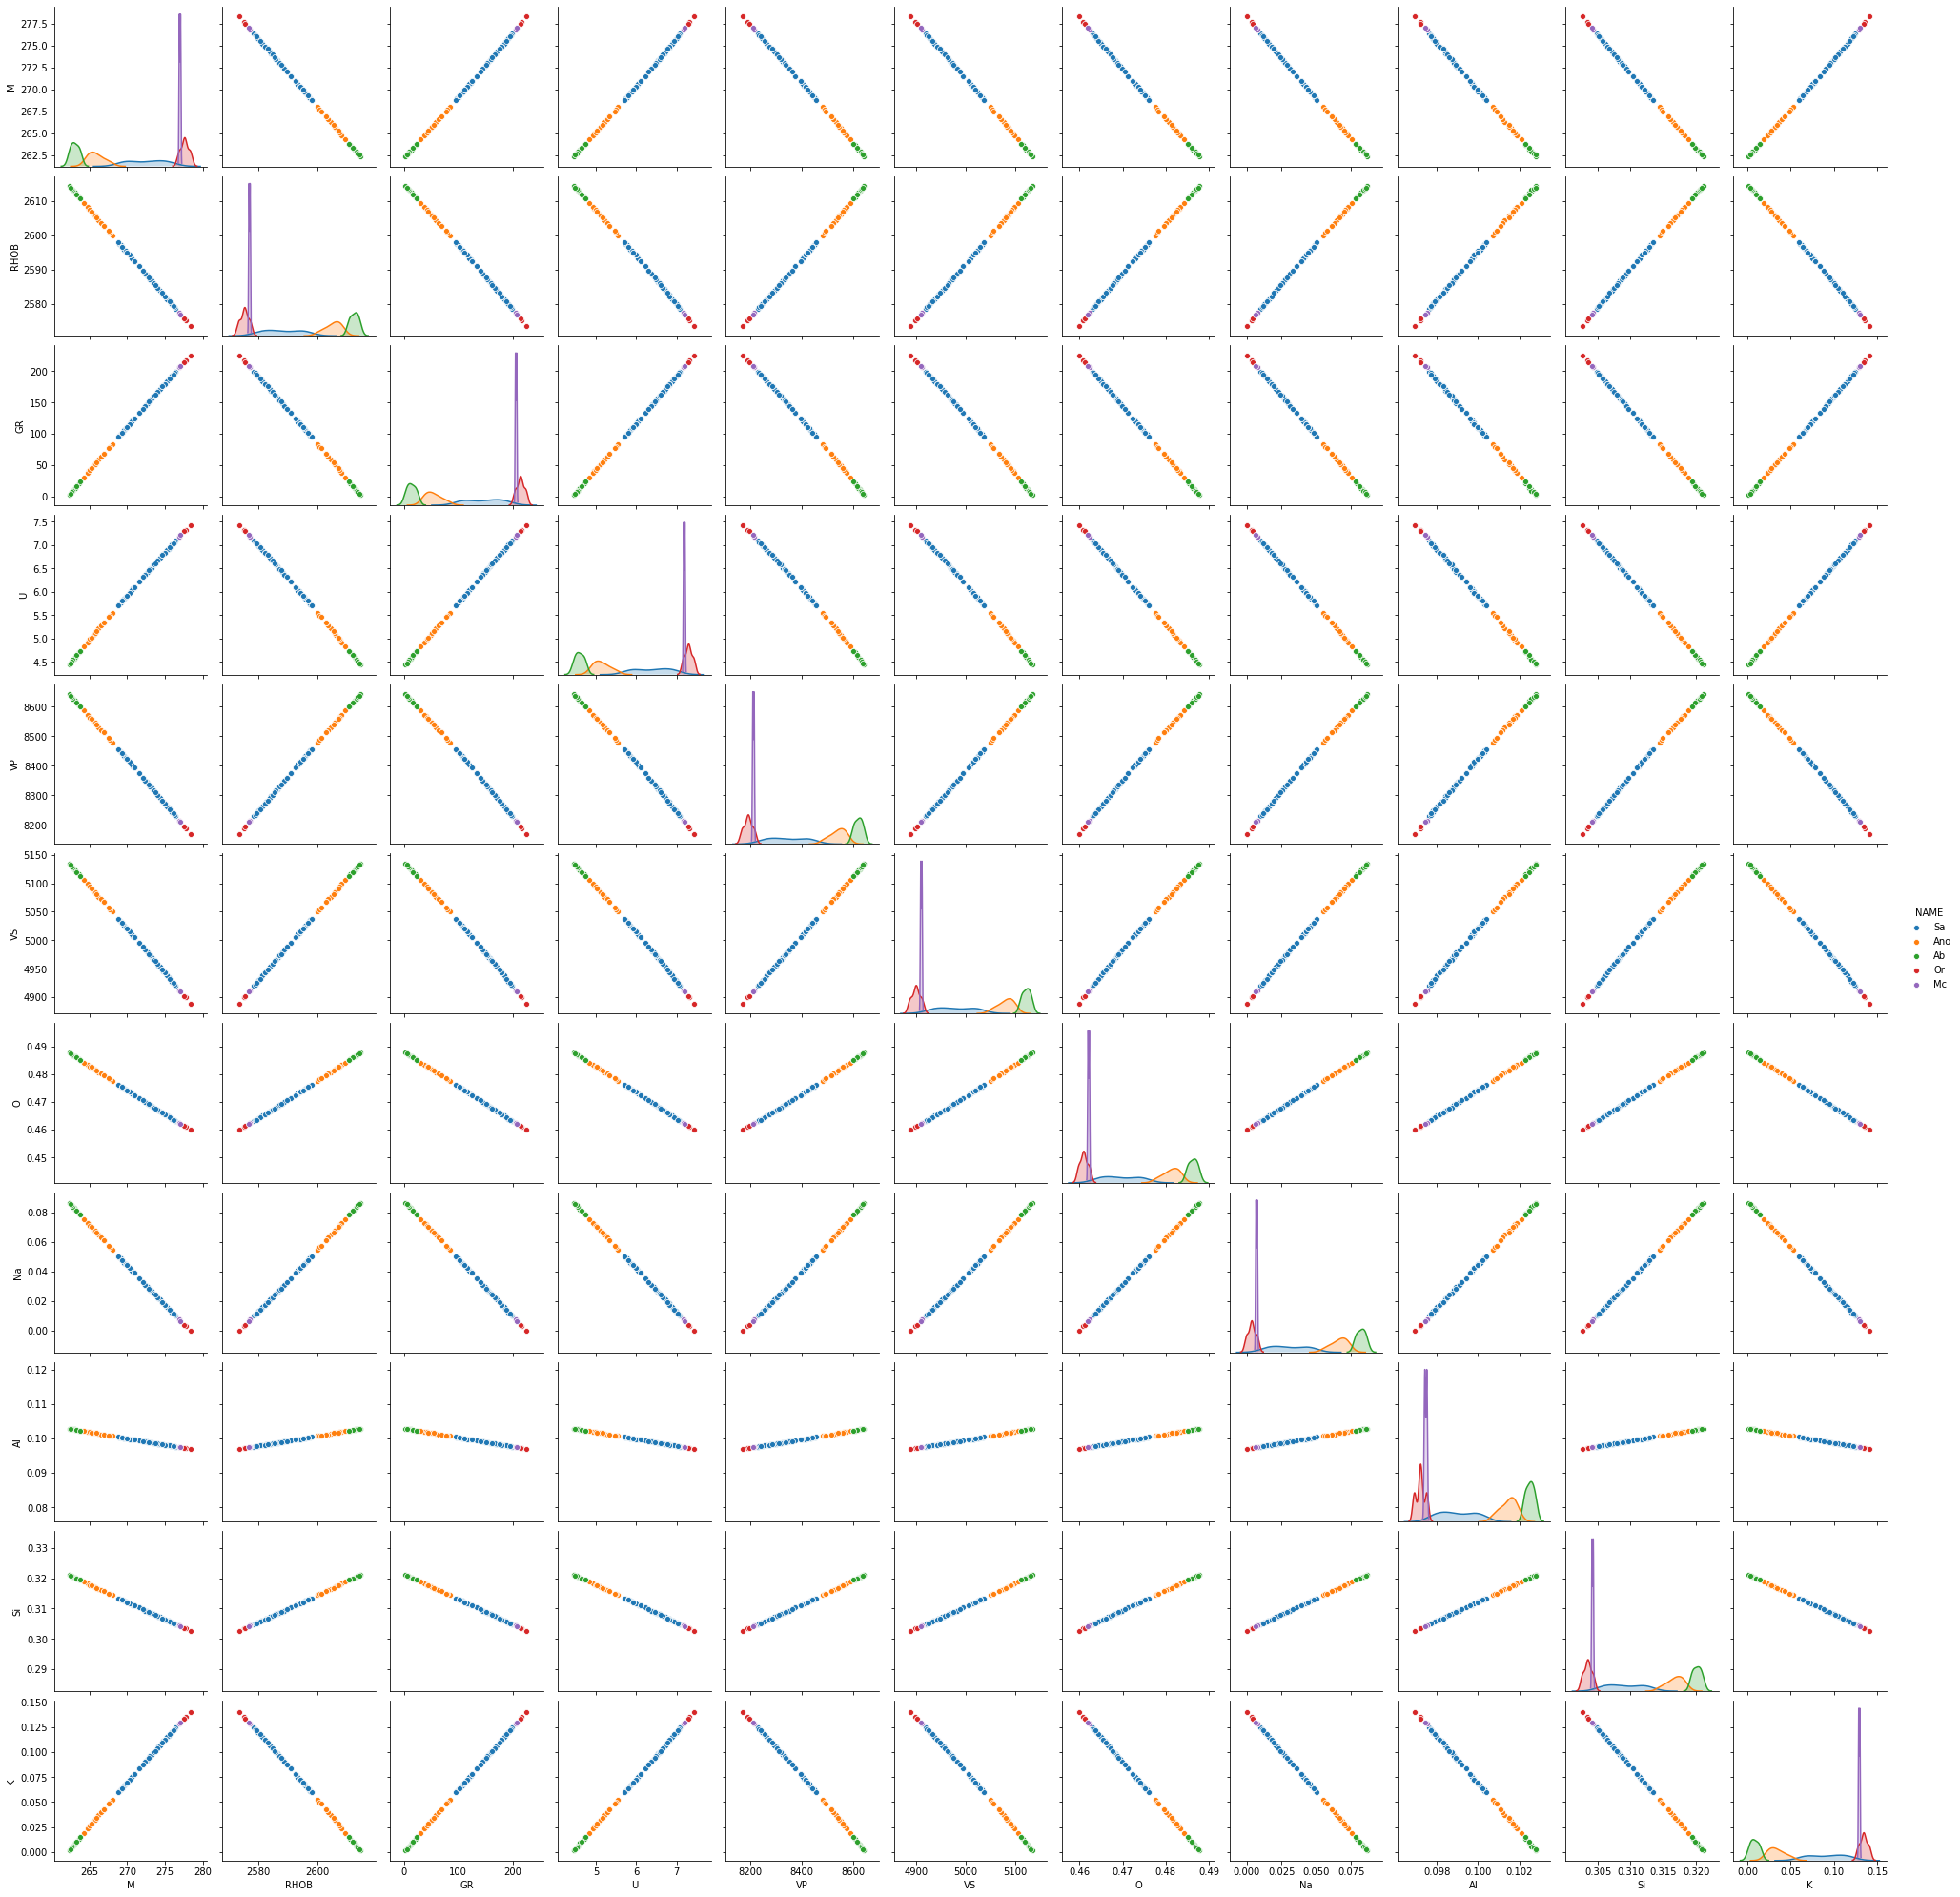

In [10]:
sns.pairplot(df_kfs, hue="NAME", diag_kind="kde")
#savef = plt.savefig("Correlation-Plot-Kfs.png", dpi=300, bbox_inches='tight',pad_inches = 0.25)
plt.show()